In this notebook, I try to visualize the characteristics of twitch users using a combination of SQLite dataframe to tidying the data and matplotlib.pyplot to visualize it. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [11]:
chats = pd.read_csv('distinct_game_count.csv')
print(chats)

                               game  COUNT(*)
0                 League of Legends    193533
1                            Dota 2     85608
2  Counter-Strike: Global Offensive     54438
3                              DayZ     38004
4               Heroes of the Storm     35310
5     The Binding of Isaac: Rebirth     29467
6                 Gaming Talk Shows     28115
7                    World of Tanks     15932
8   Hearthstone: Heroes of Warcraft     14399
9                           Agar.io     11480


#Comparison of viewers based on game using bar chart

0    193533.0
1     85608.0
2     54438.0
3     38004.0
4     35310.0
5     29467.0
6     28115.0
7     15932.0
8     14399.0
9     11480.0
Name: COUNT(*), dtype: float64


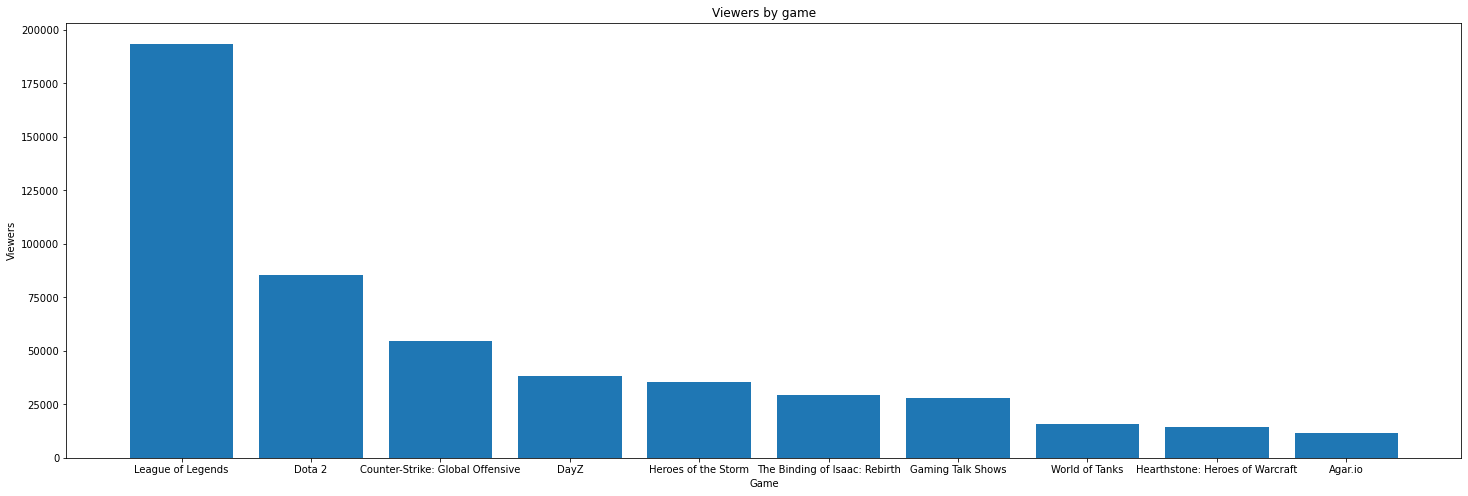

In [47]:
game = chats.game
viewers = chats['COUNT(*)'].apply(lambda x: float(x) if x is not None else 0)
print(viewers)
plt.figure(figsize=(25,8),)
ax = plt.subplot()
plt.bar(game,viewers,)
plt.xlabel('Game')
plt.ylabel('Viewers')
plt.title('Viewers by game')
plt.show()

Unique viewers watching League of Legends streams from different countries, seems like United States users watch LoL streams the most.

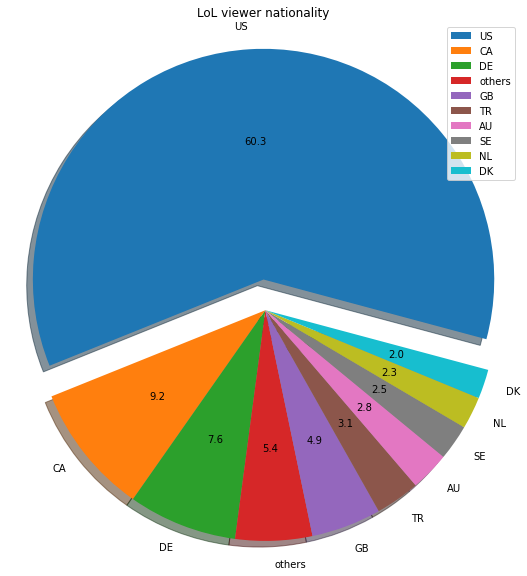

In [94]:
lol_viewer_countries = pd.read_csv('lol_viewer_countries.csv')
lol_viewer_countries['unique_viewer'] = lol_viewer_countries['viewers'].apply(lambda x: float(x))
top_ten_country_viewer = lol_viewer_countries.head(10)
top_ten_country_viewer.country[3] = 'others'
top_ten_countries = top_ten_country_viewer.country
top_ten_viewer = top_ten_country_viewer.unique_viewer
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.figure(figsize=(10,10))
plt.pie(top_ten_viewer,labels=top_ten_countries,autopct='%.1f',explode=explode,shadow=True,radius=.75,startangle=345)
plt.legend(loc=1)
plt.title('LoL viewer nationality')
plt.show()

#The line chart below shows views by hour in US. Lowest view start from 6 am till 11 am and a sudden rise at lunchtime. Streaming views peak around 8 pm to 9 pm.

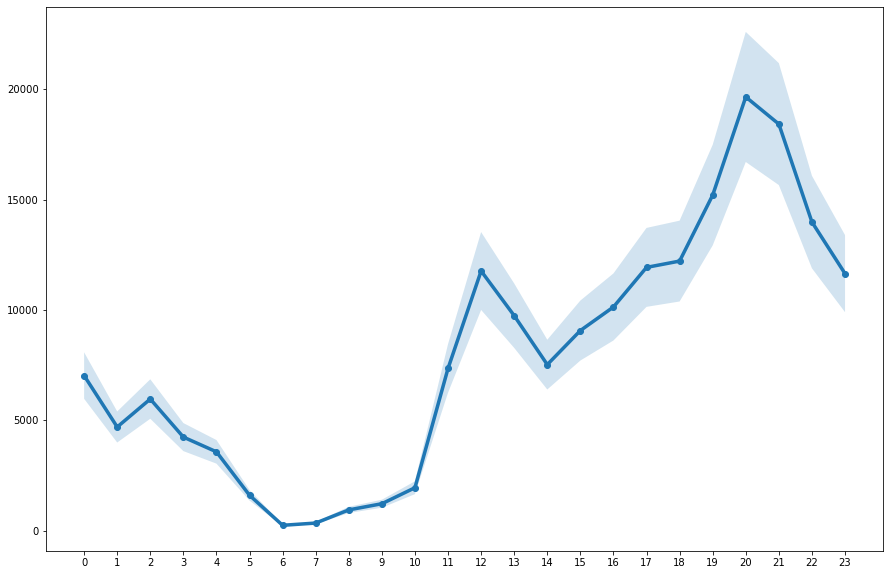

In [116]:
us_view_by_hour = pd.read_csv('us_viewer_by_hour.csv')
#print(us_view_by_hour)
start_hour = us_view_by_hour.start_hour
viewers_count = us_view_by_hour.viewers
plt.figure(figsize=(15,10))
ax = plt.subplot()
plt.plot(start_hour,viewers_count,marker='o',linewidth=3.5)
ax.set_xticks(range(len(start_hour)))
ax.set_xticklabels(start_hour)
y_upper = viewers_count.apply(lambda x: x*1.15)
y_lower = viewers_count.apply(lambda x: x*.85)
plt.fill_between(start_hour,y_lower,y_upper,alpha=.2)
plt.show()